In [1]:
%pip install numpy==1.23.5 pandas==1.5.3 seaborn
%pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
k=3

# Checking how the demographic spread looks by $k$ groups

for cross-val

In [13]:
cohort = pd.read_csv("/cephfs/cleanedData/cohort.csv")
cohort

,NumId,UserId,Gender,DOB,Age,DiabetesType,Treatment,AgeBin,Zodiac
0,0,5lZPrCk6qk8L6Jw+SU+NYDjP2u3hF6JNASttkRUi6Vc=,Female,1931-01-01,92,type-two,no,age>=90,goat
1,1,9qY9mZ+GV5Kd/O/NB1FuD4JqCUg2etZvhhFLwGTZfbY=,Male,1937-01-01,86,type-two,no,80<=age<90,ox
2,2,uhsyLhr4Zl6NfGbNBOXBvLo6ZD9OnFVF297de5/SrfE=,Female,1938-01-01,85,type-two,no,80<=age<90,tiger
3,3,9uAVHBOgoCJ9hfcrLJvRxkwT/VpWZOFZ5iqAtRY3YH8=,Male,1938-01-01,85,type-two,no,80<=age<90,tiger
4,4,Fyb156jU1edGykL7NCQBK+uTMpT7hNkq+/H1wwG1eeE=,Female,1939-01-01,84,type-two,no,80<=age<90,rabbit
...,...,...,...,...,...,...,...,...,...
7995,7995,y7iPpTOpOsK0Xx8V6oNYmyrhB5XclbVy7vNRugo2YH0=,Female,1992-01-01,31,type-two,yes-long-acting,30<=age<40,monkey
7996,7996,KbLjey5zQXaIFNFgconzI5c9FJtIpzPR36YzWVICmpM=,Female,1993-01-01,30,type-two,yes-long-acting,30<=age<40,rooster
7997,7997,JKatRtvvKlFbWRE7ewo4vaFM8c2HST13KhVKOZ7oz9U=,Female,1993-01-01,30,type-two,yes-long-acting,30<=age<40,rooster
7998,7998,saW1uk+rYwjh90Jv26OS65cgJsY6LXs90C4tt0oGXWQ=,Female,1993-01-01,30,type-two,yes-long-acting,30<=age<40,rooster


In [14]:
k_lengths = int(len(cohort['NumId'].unique())/k)
k_lengths

2666

In [15]:
cohort['foldCol'] = k-1
for i in range(0,k-1):
    print(k_lengths*i, "to", k_lengths*(i+1))
    # cohort.loc[(cohort['NumId'] >= k_lengths*i) & (cohort['NumId'] < k_lengths*(i+1)), 'foldCol'] = i
    cohort['foldCol'] = cohort['NumId'] % k
cohort

0 to 2666
2666 to 5332


,NumId,UserId,Gender,DOB,Age,DiabetesType,Treatment,AgeBin,Zodiac,foldCol
0,0,5lZPrCk6qk8L6Jw+SU+NYDjP2u3hF6JNASttkRUi6Vc=,Female,1931-01-01,92,type-two,no,age>=90,goat,0
1,1,9qY9mZ+GV5Kd/O/NB1FuD4JqCUg2etZvhhFLwGTZfbY=,Male,1937-01-01,86,type-two,no,80<=age<90,ox,1
2,2,uhsyLhr4Zl6NfGbNBOXBvLo6ZD9OnFVF297de5/SrfE=,Female,1938-01-01,85,type-two,no,80<=age<90,tiger,2
3,3,9uAVHBOgoCJ9hfcrLJvRxkwT/VpWZOFZ5iqAtRY3YH8=,Male,1938-01-01,85,type-two,no,80<=age<90,tiger,0
4,4,Fyb156jU1edGykL7NCQBK+uTMpT7hNkq+/H1wwG1eeE=,Female,1939-01-01,84,type-two,no,80<=age<90,rabbit,1
...,...,...,...,...,...,...,...,...,...,...
7995,7995,y7iPpTOpOsK0Xx8V6oNYmyrhB5XclbVy7vNRugo2YH0=,Female,1992-01-01,31,type-two,yes-long-acting,30<=age<40,monkey,0
7996,7996,KbLjey5zQXaIFNFgconzI5c9FJtIpzPR36YzWVICmpM=,Female,1993-01-01,30,type-two,yes-long-acting,30<=age<40,rooster,1
7997,7997,JKatRtvvKlFbWRE7ewo4vaFM8c2HST13KhVKOZ7oz9U=,Female,1993-01-01,30,type-two,yes-long-acting,30<=age<40,rooster,2
7998,7998,saW1uk+rYwjh90Jv26OS65cgJsY6LXs90C4tt0oGXWQ=,Female,1993-01-01,30,type-two,yes-long-acting,30<=age<40,rooster,0


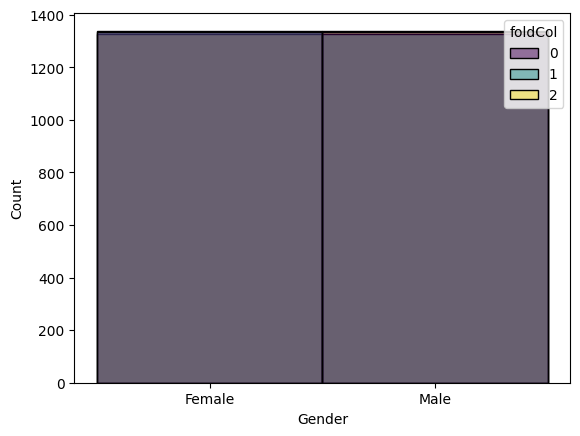

In [16]:
# cols = ['Gender','Treatment','AgeBin']
sns.histplot(cohort, x='Gender', hue='foldCol', palette='viridis')
plt.show()

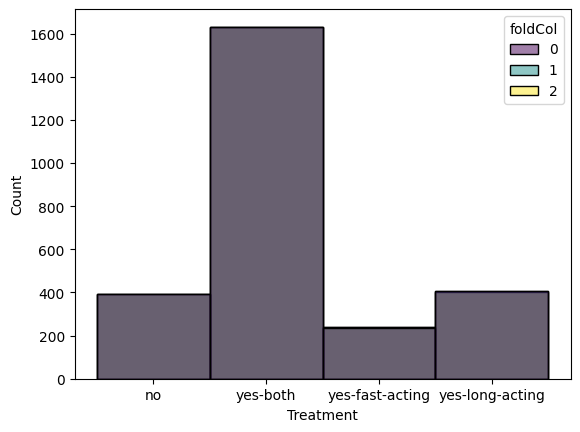

In [17]:
sns.histplot(cohort, x='Treatment', hue='foldCol', palette='viridis')
plt.show()

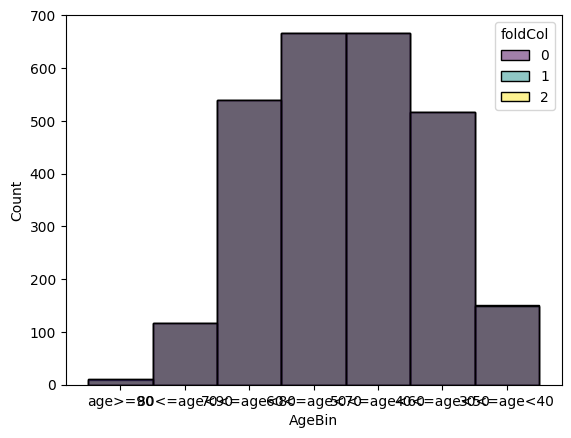

In [18]:
sns.histplot(cohort, x='AgeBin', hue='foldCol', palette='viridis')
plt.show()

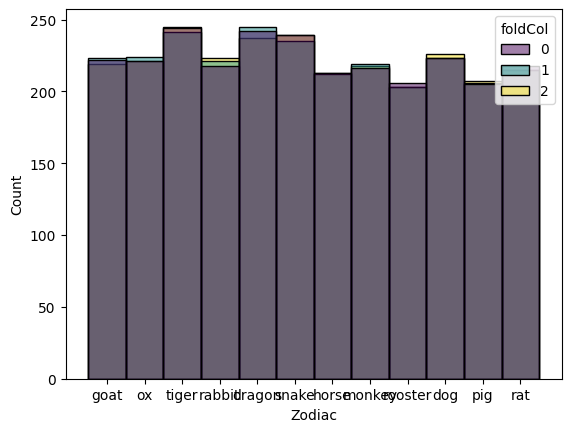

In [19]:
sns.histplot(cohort, x='Zodiac', hue='foldCol', palette='viridis')
plt.show()

# Testing the code in spark

In [4]:
cohortSchema = StructType([StructField('NumId', IntegerType(), True),
                        StructField('UserId', StringType(), True),
                        StructField('Gender', StringType(), True),
                        StructField('DOB', TimestampType(), True),
                        StructField('Age', IntegerType(), True),
                        StructField('DiabetesType', StringType(), True),
                        StructField('Treatment', StringType(), True),
                        StructField('AgeBin', StringType(), True),
                        StructField('Zodiac', StringType(), True)
                        ])

In [5]:
# read in cohort dataframe, with Number ID properly labeled
startTime = time.time()

df = spark.read.options(delimiter=',')\
        .csv('/cephfs/cleanedData/cohort.csv', header=True, schema=cohortSchema)\
        .withColumnRenamed('', 'NumId')

print(df.dtypes)
df.show(10)

# make mini dataframe of the string IDs and number IDs
patientIds = df.select(col('UserId'), col('NumId')).distinct()

print(time.time() - startTime)

[('NumId', 'int'), ('UserId', 'string'), ('Gender', 'string'), ('DOB', 'timestamp'), ('Age', 'int'), ('DiabetesType', 'string'), ('Treatment', 'string'), ('AgeBin', 'string'), ('Zodiac', 'string')]
+-----+--------------------+------+-------------------+---+------------+---------+----------+------+
|NumId|              UserId|Gender|                DOB|Age|DiabetesType|Treatment|    AgeBin|Zodiac|
+-----+--------------------+------+-------------------+---+------------+---------+----------+------+
|    0|5lZPrCk6qk8L6Jw+S...|Female|1931-01-01 00:00:00| 92|    type-two|       no|   age>=90|  goat|
|    1|9qY9mZ+GV5Kd/O/NB...|  Male|1937-01-01 00:00:00| 86|    type-two|       no|80<=age<90|    ox|
|    2|uhsyLhr4Zl6NfGbNB...|Female|1938-01-01 00:00:00| 85|    type-two|       no|80<=age<90| tiger|
|    3|9uAVHBOgoCJ9hfcrL...|  Male|1938-01-01 00:00:00| 85|    type-two|       no|80<=age<90| tiger|
|    4|Fyb156jU1edGykL7N...|Female|1939-01-01 00:00:00| 84|    type-two|       no|80<=age<90|ra

In [6]:
patIds = [i.NumId for i in df.select('NumId').distinct().collect()]
len(patIds)

8000

In [8]:
k_lengths = int(len(patIds)/k)
df = df.withColumn("foldCol", df.NumId%k)
df.show()

+-----+--------------------+------+-------------------+---+------------+---------+----------+------+-------+
|NumId|              UserId|Gender|                DOB|Age|DiabetesType|Treatment|    AgeBin|Zodiac|foldCol|
+-----+--------------------+------+-------------------+---+------------+---------+----------+------+-------+
|    0|5lZPrCk6qk8L6Jw+S...|Female|1931-01-01 00:00:00| 92|    type-two|       no|   age>=90|  goat|      0|
|    1|9qY9mZ+GV5Kd/O/NB...|  Male|1937-01-01 00:00:00| 86|    type-two|       no|80<=age<90|    ox|      1|
|    2|uhsyLhr4Zl6NfGbNB...|Female|1938-01-01 00:00:00| 85|    type-two|       no|80<=age<90| tiger|      2|
|    3|9uAVHBOgoCJ9hfcrL...|  Male|1938-01-01 00:00:00| 85|    type-two|       no|80<=age<90| tiger|      3|
|    4|Fyb156jU1edGykL7N...|Female|1939-01-01 00:00:00| 84|    type-two|       no|80<=age<90|rabbit|      0|
|    5|86XfZ0fNI0VWOzWrl...|Female|1939-01-01 00:00:00| 84|    type-two|       no|80<=age<90|rabbit|      1|
|    6|JfJMH1qCpiYN